# Import CSV data

In [ ]:
!pip install pandas
import pandas as pd

Import Age of death data setfrom kaggle

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'age-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2245634%2F3758674%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240920%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240920T093733Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4c4b4db656c73b83e4bae8995cc76eb5003e779e3490392b4ad5ae2b492afdd07530acf20bba14de7a5d4b42a8e29ce7158ee5c9d7417a13ab7dd67bf7d0daf3acc1688320fe7abe7494f61019dd9b9d76278ede46fe882ee9c7409c9e9b2713444b3c7e3261fbd843599f4641641895912b4f74a5b01e4cd1bfd09edf1fb414e8396a6995115c0c887c2c4273f63f1e78babd126d040e35264f6b2dfaecfa4ace1b8b088fa22bded1c83b1917f6eca378952585595246f52cf3582953419578bc25c6513b5091ded93c7d6cd00c3c89feaa86c78b7fa67e66dd60b29cf2a11c782200f12f989a765b30797eec182e0b1f2ff0265e7cefc519444cbb13645931'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 36109272 bytes downloaded
Downloaded and uncompressed: age-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-dataset/AgeDataset-V1.csv


Import Other Data

In [ ]:
df_cause = pd.read_csv('https://raw.githubusercontent.com/nnut21/Project_Dads5001_Data/refs/heads/main/cause_of_deaths.csv')
df_population = pd.read_csv('https://raw.githubusercontent.com/nnut21/Project_Dads5001_Data/refs/heads/main/World-population-by-countries-dataset.csv')
print('Import Data 2 and 3:Cause of death and Population')
print('==============Completed==============')

Import Data 2 and 3:Cause of death and Population
==============Completed==============


Check Data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [ ]:
df = pd.read_csv('../input/age-dataset/AgeDataset-V1.csv')
df.head(10)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0
6,Q272,Paul Morand,French writer,Male,France,Artist,1888,1976.0,NaN,88.0
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0


Check other data information

In [ ]:
df_cause.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

In [ ]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   1960          264 non-null    float64
 3   1961          264 non-null    float64
 4   1962          264 non-null    float64
 5   1963          264 non-null    float64
 6   1964          264 non-null    float64
 7   1965          264 non-null    float64
 8   1966          264 non-null    float64
 9   1967          264 non-null    float64
 10  1968          264 non-null    float64
 11  1969          264 non-null    float64
 12  1970          264 non-null    float64
 13  1971          264 non-null    float64
 14  1972          264 non-null    float64
 15  1973          264 non-null    float64
 16  1974          264 non-null    float64
 17  1975          264 non-null    float64
 18  1976          264 non-null    

In [ ]:
df_population.isna().sum()

,0
Country Name,0
Country Code,0
1960,2
1961,2
1962,2
...,...
2017,2
2018,2
2019,2
2020,2


# Cleansing

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
Id,0
Name,0
Short description,67900
Gender,133646
Country,335509
Occupation,206914
Birth year,0
Death year,1
Manner of death,1169404
Age of death,1


In [ ]:
df.loc[ df['Age of death'].isna(),:].reset_index(drop=True)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q3611993,Issa Annamoradnejad,Creator of this dataset,Male,NaN,NaN,1992,NaN,NaN,NaN


In [ ]:
#Dropping NaN age and
df=df.dropna(subset=['Age of death'])
df=df.drop(['Manner of death'],axis=1)

In [ ]:
df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,57.0


In [ ]:
print("missing percent is:")
def missing_value_percent(df):
    nan_percent= 100*(df.isnull().sum()/len(df))
    nan_percent= nan_percent[nan_percent>0].sort_values()
    return nan_percent
missing_value_percent(df)

missing percent is:


,0
Short description,5.551894
Gender,10.927665
Occupation,16.918396
Country,27.433062


**Clean Country**

In [ ]:
df['Country'].value_counts().to_csv('Counrty')

In [ ]:
df['Country'].unique()

array(['United States of America; Kingdom of Great Britain',
       'United Kingdom', 'United States of America', ...,
       'El Salvador; Prussia; German Empire; North German Confederation',
       'Syria; State of Syria; Syrian Republic',
       'El Salvador; British Empire'], dtype=object)

##**Clean Gender**

---
Just to display something unecessary to use.

In [ ]:
#Check Null data
df.loc[df['Gender'].isna() & (df['Country'].isna()) & (df['Occupation'].isna())]

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
2805,Q44431,蕭伯遊,NaN,NaN,NaN,NaN,484,506.0,22.0
13078,Q81420,蕭撝,NaN,NaN,NaN,NaN,515,573.0,58.0
31900,Q127099,Hermann Kafka,father of Franz Kafka,NaN,NaN,NaN,1852,1931.0,79.0
32227,Q129812,Kiyokawa Hachirō,NaN,NaN,NaN,NaN,1830,1863.0,33.0
32294,Q130445,Xiao Ye,NaN,NaN,NaN,NaN,479,526.0,47.0
...,...,...,...,...,...,...,...,...,...
1222804,Q76551547,Pryse Pryse Pryse,Welsh gent,NaN,NaN,NaN,1859,1900.0,41.0
1222821,Q76619756,Wilhelm-Adolf von Plettenberg-Heeren,Rittergutsbesitzer,NaN,NaN,NaN,1902,1950.0,48.0
1222823,Q76622450,Ferdinand Christoph Albrecht von Plettenberg-H...,Westfälischer Adeliger,NaN,NaN,NaN,1683,1761.0,78.0
1222851,Q76718926,Narcís Masó i Valentí,pédagogue catalan,NaN,NaN,NaN,1890,1953.0,63.0


In [ ]:
#result = df.loc[(df['Birth year']== df['Birth year'].min())| (df['Death year']== df['Death year'].max()),['Id','Birth year','Death year']]
df.sort_values(by=['Birth year', 'Death year'], ascending=[True, False])

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
126524,Q1050613,Merit-Ptah,purported Ancient Egyptian physician; most lik...,Female,NaN,Physician,-2700,-2659.0,41.0
477,Q6198,Pepi II,Egyptian pharaoh of the Sixth dynasty for the ...,Male,Ancient Egypt,Statesperson,-2284,-2200.0,84.0
78375,Q536732,Bu Bing,2nd king of the Shang dynasty in Chinese history,Male,NaN,Politician,-1800,-1734.0,66.0
96795,Q712524,Seth Meribre,ancient Egyptian sovereign,Male,Ancient Egypt,Sovereign,-1750,-1700.0,50.0
71057,Q471820,Tang of Shang,the first king of the Shang dynasty in Chinese...,Male,NaN,Politician,-1675,-1646.0,29.0
...,...,...,...,...,...,...,...,...,...
1167659,Q60186000,Bella Watts,American victim of murder,NaN,United States of America,NaN,2014,2018.0,4.0
1167660,Q60186041,Celeste Watts,American victim of murder,NaN,United States of America,NaN,2015,2018.0,3.0
1216537,Q75506604,Fiona Stewart-Brown,(1971-2015),Female,NaN,NaN,2015,2015.0,0.0
1171519,Q60710025,Julen Roselló,accident victim,NaN,Spain,NaN,2016,2019.0,3.0


In [ ]:
df.loc[((df['Birth year']< 0)| (df['Death year']<0)),['Id','Name','Birth year','Occupation','Death year','Age of death','Country']]

,Id,Name,Birth year,Occupation,Death year,Age of death,Country
45,Q635,Cleopatra,-69,Sovereign,-30.0,39.0,Ancient Egypt
68,Q859,Plato,-427,Artist,-347.0,80.0,Classical Athens
70,Q868,Aristotle,-384,Philosopher,-322.0,62.0,NaN
76,Q913,Socrates,-470,Philosopher,-399.0,71.0,Classical Athens
161,Q1523,Ramesses II,-1303,Statesperson,-1213.0,90.0,Ancient Egypt
...,...,...,...,...,...,...,...
812121,Q16076055,郭伋,-38,Politician,47.0,85.0,NaN
910007,Q19592134,Lucius Livineius Regulus,-105,Politician,-41.0,64.0,NaN
928747,Q20109060,Marcus Tullius Cicero,-200,NaN,-106.0,94.0,NaN
1038094,Q28409967,冯鲂,-1,NaN,85.0,86.0,NaN


In [ ]:
df.loc[(df['Age of death']<18)&(df['Occupation'].notna())]

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Age of death
318,Q4583,Anne Frank,German-born diarist and Holocaust victim (1929...,Female,Germany,Artist,1929,1945.0,16.0
531,Q7244,Emperor Ping of Han,emperor of the Han Dynasty,Male,Western Han Dynasty,Monarch,-9,6.0,15.0
553,Q7301,Prince of Hongnong,emperor of the Han Dynasty (176-190),Male,Eastern Han Dynasty,Politician,176,190.0,14.0
580,Q7361,Emperor Huai of Jin,3rd emperor of the Jin Dynasty (265–420),Male,China; Western Jin dynasty,Monarch,300,313.0,13.0
602,Q7420,Emperor Gong of Sui,emperor of the Sui Dynasty,Male,Sui dynasty; Tang Empire,Sovereign,605,619.0,14.0
...,...,...,...,...,...,...,...,...,...
1208225,Q66828088,Bohumil Siřínek,student uit Tsjecho-Slowakije (1955-1969),Male,Czechoslovakia,Student,1955,1969.0,14.0
1208732,Q67175519,Iñigo Alberdi Amasorrain,Spaans muzikant (1973-1984),NaN,Spain,Artist,1973,1984.0,11.0
1210368,Q68864014,Manegold of Berg,Roman Catholic bishop,NaN,NaN,Religious figure,1200,1215.0,15.0
1210445,Q68866850,Arnau de Creixell,roman-catholic bishop,Male,NaN,Religious figure,1200,1216.0,16.0




---



###Import library
for guess gender from name

In [ ]:
!pip install gender_guesser
import gender_guesser.detector as gender

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 6.1 MB/s eta 0:00:00


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,981363
Female,107829
Transgender Female,79
Transgender Male,36
Eunuch; Male,18
Intersex,7
Female; Male,7
Eunuch,3
Transgender Male; Female,3


In [ ]:
replace_dict = {
    "Transgender Male; Female": "Transgender",
    "Transgender Female; Male": "Transgender",
    "Female; Male": "Female",
    "Intersex; Transgender Male": "Transgender",
    "Transgender Person; Intersex; Transgender Male ":"Transgender",
    "Transgender Female; Female":"Transgender",
    "Transgender Male; Male":"Transgender",
    "Transgender Person; Intersex; Transgender Male":"Transgender",
    "Transgender Female; Intersex":"Transgender",
    "Female; Female":"Female",
    "Eunuch; Male":"Male",
    "Eunuch":"Male",
    "Non-Binary; Intersex":"unknown",
    "Non-Binary":"unknown",
    "Intersex":"unknown",
    "Intersex; Male":"unknown",
    "Intersex; Female":"unknown",
    "Transgender Male": "Transgender",
    "Transgender Female": "Transgender"
}

df['Gender'] = df['Gender'].replace(replace_dict, regex=False)


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,981384
Female,107837
Transgender,125
unknown,14


In [ ]:
d = gender.Detector(case_sensitive=False)

In [ ]:
df['Name_2']=df['Name'].str.split(' ').str[0]
df['Name_3']=df['Name'].str.split(' ').str[1]
display(pd.concat([df['Name'], df['Name_2'], df['Name_3']], axis=1))

,Name,Name_2,Name_3
0,George Washington,George,Washington
1,Douglas Adams,Douglas,Adams
2,Abraham Lincoln,Abraham,Lincoln
3,Wolfgang Amadeus Mozart,Wolfgang,Amadeus
4,Ludwig van Beethoven,Ludwig,van
...,...,...,...
1223004,Marie-Fortunée Besson,Marie-Fortunée,Besson
1223005,Ron Thorsen,Ron,Thorsen
1223006,Diether Todenhagen,Diether,Todenhagen
1223007,Reginald Oswald Pearson,Reginald,Oswald


In [ ]:
df['gender_2']=df['Name_2'].apply(str.capitalize).map(lambda x: d.get_gender(x))

In [ ]:
df['gender_3'] = df['Name_3'].astype(str).apply(str.capitalize).map(lambda x: d.get_gender(x))
# convert the values in the 'Name_3' column to strings before applying the capitalize function

In [ ]:
df['gender_2'].value_counts()

,count
gender_2,
male,966279
female,114049
unknown,105739
mostly_male,17134
andy,11671
mostly_female,8134


In [ ]:
replace_dict = {
    "male": "Male",
    "female": "Female",
    "mostly_female": "Female",
    "mostly_male": "Male",
    "andy": "unknown"

}

df['gender_2'] = df['gender_2'].replace(replace_dict, regex=False)
df['gender_3'] = df['gender_3'].replace(replace_dict, regex=False)


In [ ]:
# Display two DataFrames side-by-side
df_combined = pd.concat([df['Name_2'], df['Name_3'], df['Gender'],df['gender_2'],df['gender_3']], axis=1)
df_combined

,Name_2,Name_3,Gender,gender_2,gender_3
0,George,Washington,Male,Male,unknown
1,Douglas,Adams,Male,Male,unknown
2,Abraham,Lincoln,Male,Male,Male
3,Wolfgang,Amadeus,Male,Male,Male
4,Ludwig,van,Male,Male,Male
...,...,...,...,...,...
1223004,Marie-Fortunée,Besson,NaN,unknown,unknown
1223005,Ron,Thorsen,NaN,Male,unknown
1223006,Diether,Todenhagen,NaN,Male,unknown
1223007,Reginald,Oswald,Male,Male,Male


###Precision check

In [ ]:
all = df_combined.loc[df['Gender'].notna()].shape[0]
count = df_combined.loc[df_combined['Gender'].notna() & (df_combined['Gender'] != df_combined['gender_2'])].shape[0]
print("Missmatch of Gender Guesser")
print(f"{(count/all)*100:.2f},'%'")
print(f"Precision%: {(1-(count/all))*100:.2f}")

Missmatch of Gender Guesser
7.78,'%'
Precision%: 92.22


In [ ]:
df_combined.loc[df['Gender'].isna()&(df['gender_2']=='unknown')&(df['gender_3']!='unknown')&(df['Name_3'].notna())]

,Name_2,Name_3,Gender,gender_2,gender_3
1725,Li,Moran,NaN,unknown,Female
3073,Marcjan,Michał,NaN,unknown,Male
21924,Fürchtegott,Leberecht,NaN,unknown,Male
23312,Esdras,Edzard,NaN,unknown,Male
24602,Kraudn,Sepp,NaN,unknown,Male
...,...,...,...,...,...
1222440,Lady,Mary,NaN,unknown,Female
1222595,Albinia,Dalton,NaN,unknown,Male
1222707,E.,Lyall,NaN,unknown,Male
1222854,Colonel,Edward,NaN,unknown,Male


In [ ]:
# Fill df['gender_2'] based on the specified condition
df_combined.loc[
    df['Gender'].isna() & (df['gender_2'] == 'unknown') & (df['gender_3'] != 'unknown') & df['Name_3'].notna(),
    'gender_2'
] = df_combined.loc[
    df['Gender'].isna() & (df['gender_2'] == 'unknown') & (df['gender_3'] != 'unknown') & df['Name_3'].notna(),
    'gender_3'
]

In [ ]:
print("Check result")
df_combined.loc[df_combined['Gender'].isna()&(df_combined['Gender'] != df_combined['gender_2'])]

Check result


,Name_2,Name_3,Gender,gender_2,gender_3
242,Livia,Ana,NaN,Female,Female
412,Rudolf,Feustel,NaN,Male,unknown
756,Georg,Falck,NaN,Male,unknown
941,José,Santos,NaN,Male,unknown
956,Alfredo,Silva,NaN,Male,Female
...,...,...,...,...,...
1223002,Matteo,Gregorio,NaN,Male,Male
1223003,Giulia,Sofia,NaN,Female,Female
1223004,Marie-Fortunée,Besson,NaN,unknown,unknown
1223005,Ron,Thorsen,NaN,Male,unknown


In [ ]:
df['Gender']=df['Gender'].fillna(df['gender_2'])
df['Gender'].isna().sum()

0

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,1058349
Female,123554
unknown,40978
Transgender,125


##**Clean Country**

In [ ]:
df['Country_2']=df['Country'].str.split(';').str[0]
df['Country_3']=df['Country'].str.split(';').str[1]
display(pd.concat([df['Country'], df['Country_2'], df['Country_3']], axis=1))
#df_name

,Country,Country_2,Country_3
0,United States of America; Kingdom of Great Bri...,United States of America,Kingdom of Great Britain
1,United Kingdom,United Kingdom,NaN
2,United States of America,United States of America,NaN
3,Archduchy of Austria; Archbishopric of Salzburg,Archduchy of Austria,Archbishopric of Salzburg
4,Holy Roman Empire; Austrian Empire,Holy Roman Empire,Austrian Empire
...,...,...,...
1223004,France,France,NaN
1223005,Canada; United States of America,Canada,United States of America
1223006,Germany,Germany,NaN
1223007,United Kingdom,United Kingdom,NaN


# Overview plot
Test

In [ ]:
import seaborn as sns

<Axes: xlabel='Gender', ylabel='Age of death'>

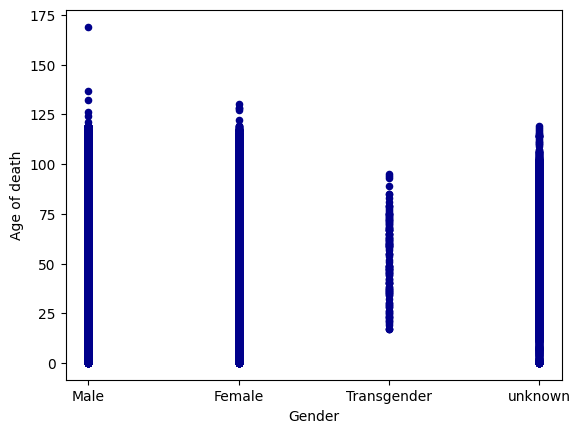

In [ ]:
df.plot.scatter(x='Gender',y='Age of death', c='DarkBlue')

In [94]:
# Reshape the data
df_melted = df_population.melt(id_vars='Country Name', var_name='Year', value_name='Population')
#Skip Country Code
df_melted = (df_melted[df_melted['Year'] != 'Country Code'])
# Convert 'Year' to numeric (if necessary)
df_melted['Year'] = pd.to_numeric(df_melted['Year'])

df_melted.sort_values(by='Country Name', ascending=True)
#df_melted


,Country Name,Year,Population
2662,Afghanistan,1969,10893772.0
5056,Afghanistan,1978,13341199.0
14898,Afghanistan,2015,34413603.0
15962,Afghanistan,2019,38041757.0
14366,Afghanistan,2013,32269592.0
...,...,...,...
9575,Zimbabwe,1994,11261752.0
9309,Zimbabwe,1993,11092775.0
9043,Zimbabwe,1992,10900511.0
8245,Zimbabwe,1989,10153852.0


In [ ]:
df_melted.loc[df_melted['Country Name']=='World']

,Country Name,Year,Population
525,World,1960,3032156070.0
791,World,1961,3071596055.0
1057,World,1962,3124561005.0
1323,World,1963,3189655687.0
1589,World,1964,3255145692.0
...,...,...,...
15687,World,2017,7519371102.0
15953,World,2018,7602716232.0
16219,World,2019,7683806444.0
16485,World,2020,7763932702.0


In [ ]:
# Group by 'Country' and calculate the mean of the 'Population'
average_population = df_melted.groupby('Country Name')['Population'].mean()

# Sort the average population from max to min
average_population_sorted = average_population.sort_values(ascending=False)
average_population_sorted = pd.to_numeric(average_population_sorted)
# Display the result
average_population_sorted.div(1_000_000).round(2).head(15)



,Population
Country Name,
World,5342.66
IDA & IBRD total,4365.16
Low & middle income,4294.94
Middle income,3948.83
IBRD only,3446.13
Early-demographic dividend,2086.91
Lower middle income,2069.20
Upper middle income,1879.63
Late-demographic dividend,1793.19


In [ ]:
df_population['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

In [ ]:
df_population.loc[df_population['Country Name']=='Thailand']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
233,Thailand,THA,27397208.0,28224186.0,29080945.0,29966873.0,30881136.0,31822656.0,32789129.0,33778804.0,...,67835969.0,68144519.0,68438748.0,68714519.0,68971313.0,69209817.0,69428454.0,69625581.0,69799978.0,69950844.0


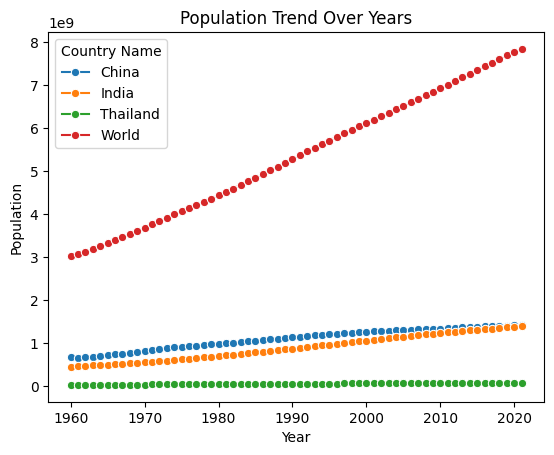

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Filter for specific countries (e.g., 'Thailand', 'USA', 'China')
countries_focus = ['Thailand', 'USA', 'China','India','World']
df_filtered = df_melted[df_melted['Country Name'].isin(countries_focus)]

# Plot population trend over years
sns.lineplot(data=df_filtered, x='Year', y='Population', hue='Country Name', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trend Over Years')

# Show the plot
plt.show()
